In [137]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [138]:
import nest
import nest.topology as topo # import topology as a submodule of nest
import nest.raster_plot
import numpy as np

In [147]:
nest.ResetKernel()

In [148]:
ext = 2. # here we use a square layer of size (ext x ext)
n_mc=30  #pyramidal neurons in each minicolumn

pos = [[np.random.uniform(-ext/2,ext/2), np.random.uniform(-ext/2,ext/2)] for j in range(n_mc)]  #position of each pyramidal neuron

layer2 = {
    'extent': [ext, ext],
    'positions': pos,
    #'elements': 'iaf_neuron'
    'elements': 'aeif_cond_alpha'  #adaptative exponential integrate and firing as neuron model
}

In [149]:
n_top=192  #number of minicollumns (12 in each of the 16 hipercolumns)
mc=[0]*n_to
for i in range (0,n_top-1):  #create the minicollumns
    mc[i]=topo.CreateLayer(layer2)

In [150]:
# circular mask, gaussian kernel
conn1 = {
    'connection_type': 'divergent', # convergent or divergent
    'mask': {'circular': {'radius': 2.}},
    'kernel': {'gaussian': {'p_center': 1., 'sigma': 5}}, # 
    'allow_autapses': False
}


# rectangular mask, constant kernel, non-centered anchor
conn2 = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-1., -1.], 'upper_right': [1.,1.]},
             'anchor': [0.0, 0.0]
             },
    'kernel': 0.75,
    'allow_autapses': False
}


# doughnut mask, linear kernel that decreases with distance
conn3 = {
    'connection_type': 'divergent',
    'mask': {'doughnut': {'inner_radius': 0.3, 'outer_radius': 0.8}},
    'kernel': {'linear': {'c': 1., 'a': -0.9}}
}


# rectangle mask, fixed number of connections, gaussian weights, linear delays
conn4 = {
    'connection_type': 'divergent',
    'mask': {'rectangular': {'lower_left': [-0.5, -0.5], 'upper_right': [0.5, 0.5]}},
    'number_of_connections': 20,
    'weights': {'gaussian': {'p_center': 1.5, 'sigma': 0.25}},
    'delays': {'linear': {'c': 0.1, 'a': 0.2}},
    'allow_autapses': False
}
#
#
#
#EVERYTHING RIGHT UNTIL HERE!
#
#
#

In [151]:
# make a copy of the poisson_generator model and specify the rate
nest.CopyModel('poisson_generator', 'my_poisson_generator', {'rate': 200000.} )

noise_layer_dict = {
    'extent': [ext, ext],
    'positions': [[0.0, 0.0]],
    'elements': 'my_poisson_generator'
}

In [152]:
noiselayer = topo.CreateLayer(noise_layer_dict)  

In [153]:
for j in range(0,n_top-1):  #connect layer to poisson generator
    topo.ConnectLayers(noiselayer, mc[j], conn2)

(5923,)


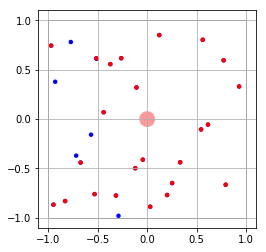

In [154]:
layer = mc[0]
conn_dict = conn1

fig = topo.PlotLayer(layer)
ctr = topo.FindCenterElement(noiselayer) # extract GID of poisson generator
topo.PlotTargets(ctr, layer, fig=fig, mask=conn_dict['mask'], mask_color='green',
                 src_size=250, src_color='red',
                 tgt_size=20, tgt_color='red')
   
# beautify
pylab.axes().set_xticks(pylab.arange(-ext/2., ext/2.+0.5, 0.5))
pylab.axes().set_yticks(pylab.arange(-ext/2., ext/2.+0.5, 0.5))
pylab.grid(True)
print(ctr)